# Assignement 1

You will hand in the assignment through a Jupyter notebook, also with your environment and the dataset you picked, both zipped together and submitted as one file. Please name your file so that it contains your group number. It is important that you clearly state the tasks you are performing on the dataset as questions or something similar in the notebook before you do the operations on the data. Also make sure to document your solutions and your thinking so that it can easily be followed. If you fail to do these things, you may not pass this assignment.

The deadline of this assignment is on April 12, 2025 to get bonus points, or before the exam (in which case no bonus points are awarded).

Re-submission 1 is by the end of week 33, 2025.

Re-submission 2 is by the end of week 2, 2026.

# Exercice 1 task
- Data exploration
- Data proprocessing
- Combining datasets

We choosed to go with Data exploration. We are gonna see the different sectors and gas present in the dataset, the years and is there is any missing values.

# Open the csv

In [2]:
import pandas as pd

# Read the data from the csv and print it to be sure it worked
df = pd.read_csv('../Total air emissions by greenhouse gas.csv', na_values="..")
print(df)

                               greenhouse gas  \
0        Total Greenhouse Gases (kt CO2-eqv.)   
1        Total Greenhouse Gases (kt CO2-eqv.)   
2        Total Greenhouse Gases (kt CO2-eqv.)   
3        Total Greenhouse Gases (kt CO2-eqv.)   
4        Total Greenhouse Gases (kt CO2-eqv.)   
..                                        ...   
149  Sulphur Hexafluoride (SF6) (kt CO2-eqv.)   
150  Sulphur Hexafluoride (SF6) (kt CO2-eqv.)   
151  Sulphur Hexafluoride (SF6) (kt CO2-eqv.)   
152  Sulphur Hexafluoride (SF6) (kt CO2-eqv.)   
153  Sulphur Hexafluoride (SF6) (kt CO2-eqv.)   

                                                sector     1990     1991  \
0    NATIONAL TOTAL (excluding LULUCF, excluding in...  71203.3  71338.8   
1    NATIONAL TOTAL (excluding LULUCF, including in...  74942.3  75103.8   
2    NATIONAL TOTAL (including LULUCF, excluding in...  11863.2  12988.4   
3    NATIONAL TOTAL (including LULUCF, including in...  15602.2  16753.4   
4         OFF-ROAD VEHICLES AND

Total missing values: 1339

Missing values by column:
greenhouse gas     0
sector             0
1990              42
1991              41
1992              41
1993              41
1994              41
1995              40
1996              40
1997              40
1998              39
1999              39
2000              39
2001              39
2002              39
2003              38
2004              38
2005              39
2006              39
2007              39
2008              39
2009              39
2010              39
2011              39
2012              38
2013              38
2014              39
2015              39
2016              39
2017              38
2018              39
2019              39
2020              40
2021              40
2022              40
2023              40
dtype: int64
0       0
1       0
2       0
3       0
4       0
       ..
149    34
150    34
151     0
152    34
153    34
Length: 154, dtype: int64


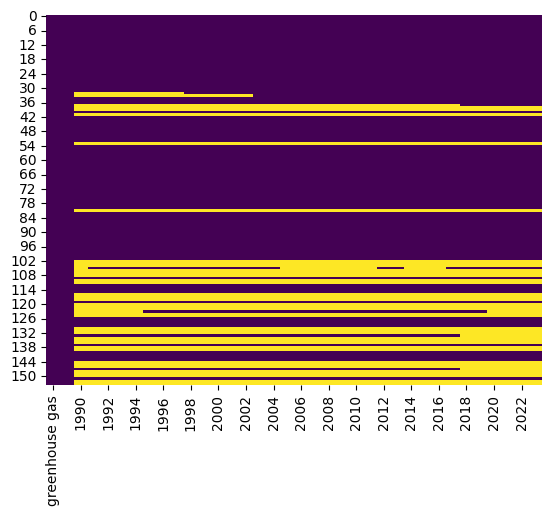

In [3]:
# Total missing values
tot_na = pd.isna(df).sum().sum()
print(f"Total missing values: {tot_na}\n")

# Missing values by column
row_na = pd.isna(df).sum()
print(f"Missing values by column:\n{row_na}")

#missing values by row
missing_per_row = df.isnull().sum(axis=1)
print(missing_per_row)

# Heatmap of missing values
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(df.isnull(), cmap="viridis", cbar=False)
plt.show()

# Different gases and sectors
Print all different gases and sectors

In [ ]:
def print_list(title, lst):
    print(title)
    for i in lst:
        print(f"\t{i}")

print_list("Unique greenhouse gases:", df["greenhouse gas"].unique())
print_list("Unique sectors:", df["sector"].unique())

Unique greenhouse gases:
	Total Greenhouse Gases (kt CO2-eqv.)
	Carbon Dioxide (CO2) (kt)
	Biogenic carbon dioxide (CO2) from fuels (kt)
	Methane (CH4) (t)
	Nitrous Oxide (N2O) (kt CO2-eqv.)
	Methane (CH4) (kt CO2-eqv.)
	Nitrous Oxide (N2O) (t)
	Hydrofluorocarbons (HFCs) (kt CO2-eqv.)
	Perfluorocarbons (PFCs) (kt CO2-eqv.)
	Sulphur Hexafluoride (SF6) (kg)
	Sulphur Hexafluoride (SF6) (kt CO2-eqv.)
Unique sectors:
	NATIONAL TOTAL (excluding LULUCF, excluding international transports)
	NATIONAL TOTAL (excluding LULUCF, including international transports)
	NATIONAL TOTAL (including LULUCF, excluding international transports)
	NATIONAL TOTAL (including LULUCF, including international transports)
	OFF-ROAD VEHICLES AND OTHER MACHINERY, TOTAL
	WASTE, TOTAL
	ELECTRICITY AND DISTRICT HEATING, TOTAL
	INDUSTRY, TOTAL
	DOMESTIC TRANSPORT, TOTAL
	INTERNATIONAL TRANSPORT, TOTAL
	AGRICULTURE, TOTAL
	SOLVENT USE AND OTHER PRODUCT USE, TOTAL
	HEATING OF HOUSES AND PREMISES, TOTAL
	LAND-USE, LAND-USE CH